In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def System(r, t, L = 1):
    
    """
    Sistema de ecuaciones angulares.

    Parámetros:
    - r: tupla con el valor del angulo inicial en radianes y velocidad angular inicial.
    - t: pasos de tiempo.
    - L: Longitud de la varilla (predeterminado como 1 metro)

    Retorna:
    - Lista con dos calores actualizados de 
    """
    
    g = 9.81
    
    theta0, theta0_dt = r
    
    theta_dt = theta0_dt
    theta_2dt = ( (2/L)*g - np.cos(theta0)*theta_dt**2 )*np.sin(theta0)/((np.sin(theta0))**2 + 1/3)
    
    return [theta_dt, theta_2dt]

In [4]:
def Integrator2(f, r0, t):
    
    h = t[1] - t[0]
    #print(h)
    
    x = np.zeros_like(t)
    vx = np.zeros_like(t)
    
    x[0] = r0[0]
    vx[0] = r0[1]
    
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    
    # Las pendientes instantaneas
    R = np.zeros(2)

    for i in range(1,len(t)):
        
        
        R = np.array([x[i-1], vx[i-1]])
        
        # print('valor instantaneo', R)
        
        K1 = f(R, t[i-1])
        
        R = np.array([x[i-1]+h*K1[0], vx[i-1]+h*K1[1]])
        
        K2 = f(R,t[i-1]+h)
        
        x[i] = x[i-1] + 0.5*h*(K1[0]+K2[0])
        
        vx[i] = vx[i-1] + 0.5*h*(K1[1]+K2[1])
        
        # print('x', x[i], 'vx', vx[i])
        
    return x,vx

In [52]:
t = np.linspace(0,0.5,50)
h = 0.1
r0 = (10*np.pi/180, 0)

In [53]:
x, vx = Integrator2(System,r0,t)

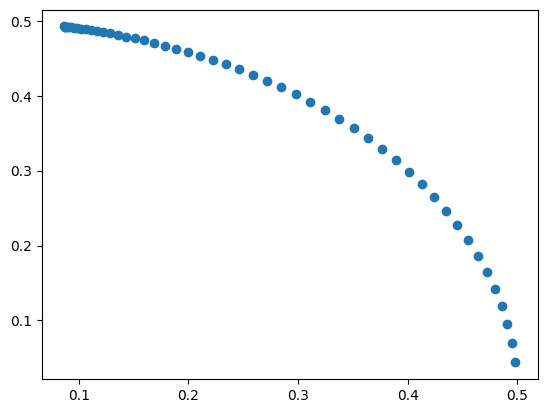

In [54]:
plt.scatter(np.sin(x)/2, np.cos(x)/2)

In [8]:
#plt.plot(x,y)
plt.plot(np.sin(r[:,0])/2,np.cos(r[:,1])/2)

NameError: name 'r' is not defined